### 한글 워드클라우드
-   한빛아카데미 > 새로나온 책 - TAG정보

#### 1. 크롤링

In [2]:
import requests
import pandas as pd
from tqdm import tqdm
from bs4 import BeautifulSoup

In [3]:
base_url = 'https://www.hanbit.co.kr'
main_url = '/academy/books/new_book_list.html'

In [4]:
lines = []
for page in tqdm(range(1, 24)):               # 사이트 총 페이지 다시 확인(23 페이지)
    url = f'{base_url}{main_url}?page={page}'
    result = requests.get(url)
    soup = BeautifulSoup(result.text)
    lis = soup.select('li.sub_book_list')
    for li in lis:
        href = li.select_one('.pop_quick_bg')['onclick'][10:-1]
        res = requests.get(base_url + href)
        book_soup = BeautifulSoup(res.text)
        tags = book_soup.select('.tag_area > a')
        for a in tags:
            lines.append(a.get_text().strip())

100%|██████████| 23/23 [05:12<00:00, 13.61s/it]


In [5]:
lines[:10]

['매트랩',
 'MATLAB',
 '매트랩 프로그래밍',
 '의학통계',
 '논문',
 '통계',
 '분석',
 '데이터분석',
 'jamovi',
 '메타분석']

In [6]:
len(lines)

2662

#### 2. 워드 클라우드 만들기

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False      # minus오류 없애는
from wordcloud import WordCloud, STOPWORDS

- 태그 리스트(lines)를 frequency dictionary로 만들기

In [12]:
tag_set = set(lines)
len(tag_set)    # 총 단어수

1425

In [13]:
# 풀어쓰기
tag_dict = {}
for item in tag_set:
    tag_dict[item] = lines.count(item)

# 단어 dict를 만든다
tag_dict = {item: lines.count(item) for item in tag_set}

In [15]:
count = 0
for key, val in tag_dict.items():
    print(key, ':', val)
    count += 1
    if count>5:
        break

 : 1
CMOS : 1
Thermodynamics : 1
Calculus : 1
IT교육 : 2
비트브릭 : 1


- 워드 클라우드

In [25]:
wc = WordCloud(
    background_color='white', random_state=2023
)
wc = wc.generate_from_frequencies(tag_dict)

(-0.5, 399.5, 199.5, -0.5)

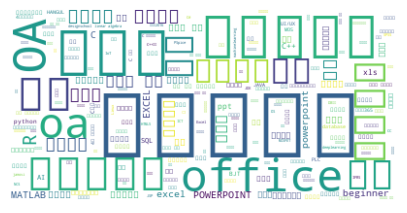

In [26]:
plt.figure(figsize=(5,3))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

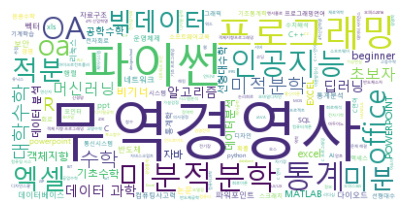

In [27]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(tag_dict)       # frequencies 딕셔너리 씀

plt.figure(figsize=(5,3))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

- 태그 단어 리스트를 펼쳐서 문자열로 만든 후 워드 클라우드 만들기

In [22]:
tag_text = ' '.join(lines)
print(tag_text[:100])

매트랩 MATLAB 매트랩 프로그래밍 의학통계 논문 통계 분석 데이터분석 jamovi 메타분석 패널데이터 의사 의학 보건 정보 교육 교과교육론 정보교과교육 SW교육 IT교육 회로 


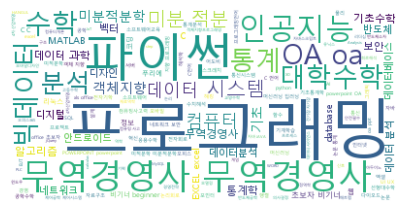

In [28]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf'
).generate(tag_text)                        # 워드클라우드한테 맡김

plt.figure(figsize=(5,3))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');